In [1]:
from HeaderP import *

In [2]:
df=pd.read_pickle('../SecondYear_2/Data/CannonDR16_cut.pkl')

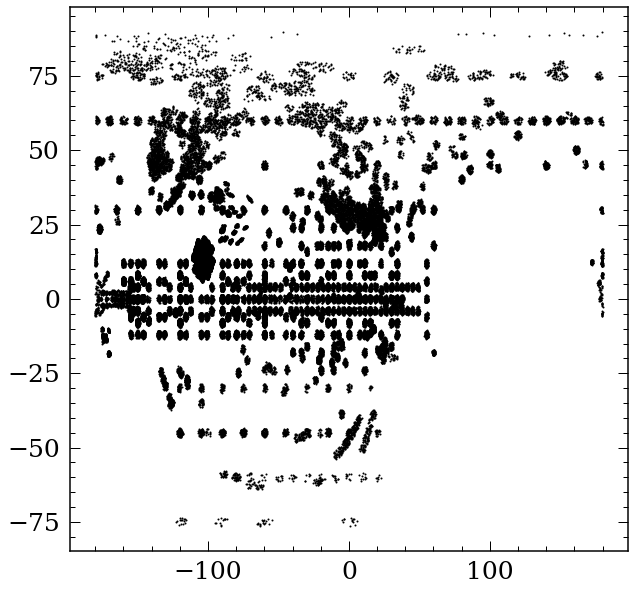

In [3]:
df['GLON']=df['GLON']-180
df['dist']=df['dist']=np.sqrt(df['X']**2+df['Y']**2)
plt.scatter(df['GLON'],df['GLAT'],s=1,c='k')


In [4]:
"""
from astropy.coordinates import Angle, Latitude, Longitude
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5

df['dist']=np.sqrt(df['X']**2+df['Y']**2)
df=df.dropna(subset=['dist'])
c = SkyCoord(df['RA'].values*u.deg, df['DEC'].values*u.deg, distance=df['dist'].values*u.kpc,frame='icrs')
c.cartesian

plt.scatter(c.cartesian.x,c.cartesian.y,s=1,c='k',alpha=0.2)
d=SkyCoord(c.cartesian.x, c.cartesian.y, c.cartesian.z, representation='cartesian')

d.representation = 'spherical'
d

plt.scatter(d.ra,d.dec,s=1,c='k')
plt.scatter(df['RA'],df['DEC'],s=1,c='r')
"""

"\nfrom astropy.coordinates import Angle, Latitude, Longitude\nfrom astropy.coordinates import SkyCoord\nfrom astropy.coordinates import ICRS, Galactic, FK4, FK5\n\ndf['dist']=np.sqrt(df['X']**2+df['Y']**2)\ndf=df.dropna(subset=['dist'])\nc = SkyCoord(df['RA'].values*u.deg, df['DEC'].values*u.deg, distance=df['dist'].values*u.kpc,frame='icrs')\nc.cartesian\n\nplt.scatter(c.cartesian.x,c.cartesian.y,s=1,c='k',alpha=0.2)\nd=SkyCoord(c.cartesian.x, c.cartesian.y, c.cartesian.z, representation='cartesian')\n\nd.representation = 'spherical'\nd\n\nplt.scatter(d.ra,d.dec,s=1,c='k')\nplt.scatter(df['RA'],df['DEC'],s=1,c='r')\n"

create mask for simulation

In [5]:
sim=pd.read_pickle('Data/Buck_g2_79e12.pkl')
#sim=pd.read_pickle('Data/Buck_g7_08e11.pkl')
#sim['x']=sim['x_today']*2
#sim['y']=sim['y_today']*2

sim['x']=sim['x_today']
sim['y']=sim['y_today']
sim['z']=sim['z_today']

In [6]:
import math as m
r0=8.2
x=sim['x'].values
y=r0+sim['y'].values
z=sim['z'].values
dist=np.sqrt(x**2+y**2)
sim['dist']=dist

ls=np.zeros(len(sim))
bs=np.zeros(len(sim))
for i in range(len(x)):
    ls[i] = m.atan2(-x[i],y[i])
    bs[i] = m.atan2(z[i], dist[i])
    
sim['l']  = ls*180/np.pi
sim['b'] = bs*180/np.pi

#print(min(sim['l']))

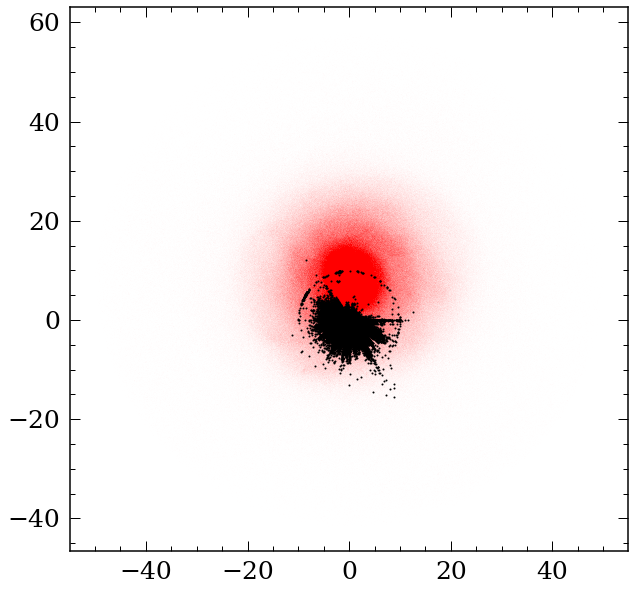

In [7]:
plt.scatter(sim['x'],sim['y']+8.2,s=0.01,alpha=0.01,c='r')
plt.scatter(df['X'],df['Y'],s=1,c='k')

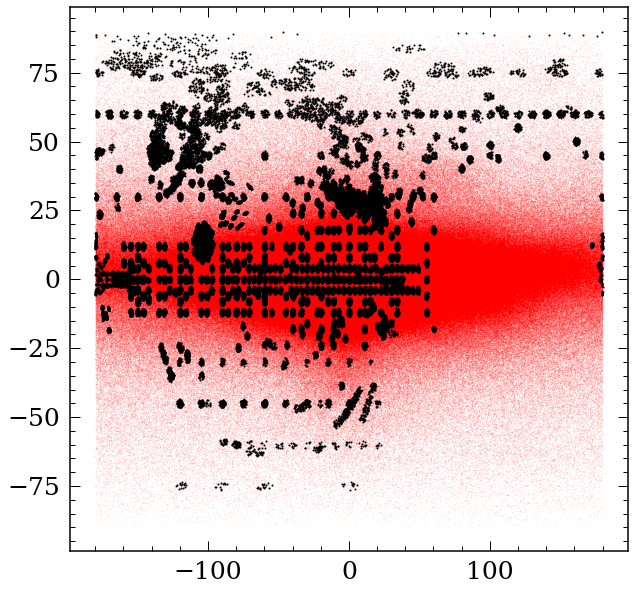

In [8]:
plt.scatter(sim['l'],sim['b'],s=0.1,alpha=0.1,c='r')
plt.scatter(df['GLON'],df['GLAT'],s=1,c='k')

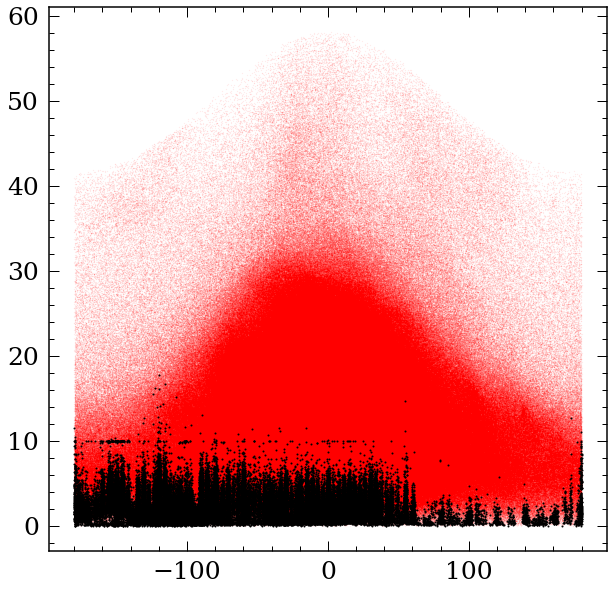

In [9]:
plt.scatter(sim['l'],sim['dist'],s=0.1,alpha=0.1,c='r')
plt.scatter(df['GLON'],df['dist'],s=1,c='k')


In [10]:
"""
# birth radius cut
sim['R_bir']=np.sqrt((sim['x_birth'])**2+sim['y_birth']**2)
Rcut_thread=15
zcut_thread=5
sim=sim.loc[sim['R_bir']<Rcut_thread].reset_index(drop=True)
sim=sim.loc[abs(sim['z_birth'])<zcut_thread].reset_index(drop=True)
"""

"\n# birth radius cut\nsim['R_bir']=np.sqrt((sim['x_birth'])**2+sim['y_birth']**2)\nRcut_thread=15\nzcut_thread=5\nsim=sim.loc[sim['R_bir']<Rcut_thread].reset_index(drop=True)\nsim=sim.loc[abs(sim['z_birth'])<zcut_thread].reset_index(drop=True)\n"

In [11]:
"""
sim=sim.dropna(subset=['x','y','z']).reset_index(drop=True)
d=SkyCoord(sim.x.values*u.kpc, sim.y.values*u.kpc, sim.z.values*u.kpc, representation='cartesian')
d.representation = 'spherical'
d

sim['ra']=d.ra
sim['dec']=d.dec
sim['dist']=d.distance

plt.scatter(sim['ra'],sim['dec'],s=0.01,alpha=0.05,c='r')
plt.xlabel('RA')
plt.ylabel('Dec')
"""

"\nsim=sim.dropna(subset=['x','y','z']).reset_index(drop=True)\nd=SkyCoord(sim.x.values*u.kpc, sim.y.values*u.kpc, sim.z.values*u.kpc, representation='cartesian')\nd.representation = 'spherical'\nd\n\nsim['ra']=d.ra\nsim['dec']=d.dec\nsim['dist']=d.distance\n\nplt.scatter(sim['ra'],sim['dec'],s=0.01,alpha=0.05,c='r')\nplt.xlabel('RA')\nplt.ylabel('Dec')\n"

In [12]:
"""
plt.scatter(sim['x'],sim['y'],c='k',s=0.01,alpha=0.01)
plt.scatter(df['X'],df['Y'],c='r',s=0.1,alpha=0.1)
print(np.shape(sim))
plt.xlim([-10,10])
plt.ylim([-10,10])

sim['R']=np.sqrt((sim['x']-8.2)**2+sim['y']**2)
plt.scatter(sim['R'],sim['z_today'],c='k',s=0.01,alpha=0.01)
plt.scatter(df['R'],df['z'],c='r',s=1)
print(np.shape(sim))
"""

"\nplt.scatter(sim['x'],sim['y'],c='k',s=0.01,alpha=0.01)\nplt.scatter(df['X'],df['Y'],c='r',s=0.1,alpha=0.1)\nprint(np.shape(sim))\nplt.xlim([-10,10])\nplt.ylim([-10,10])\n\nsim['R']=np.sqrt((sim['x']-8.2)**2+sim['y']**2)\nplt.scatter(sim['R'],sim['z_today'],c='k',s=0.01,alpha=0.01)\nplt.scatter(df['R'],df['z'],c='r',s=1)\nprint(np.shape(sim))\n"

In [13]:
np.shape(sim),np.shape(df)

((7950040, 33), (64399, 230))

In [14]:
sim=sim[['iords','l','b','dist']]

Get stars closest to location of the APOGEE star

In [15]:
def findstars(f1,f2,f3,ids,f1_star,f2_star,f3_star,cutnumb=20,discnum=3):
    # f1,f2,f3,ids are data you try to match to and the ids
    # f1_star, f2_star, f3_star is the selection you want to match to (nomrall smaller number)
    KIDs=np.array([])
    count=0
    
    xes=np.linspace(min(f1_star),max(f1_star),cutnumb+1)
    yes=np.linspace(min(f2_star),max(f2_star),cutnumb+1)
    zes=np.linspace(min(f3_star),max(f3_star),discnum+1)
    print(np.diff(zes))

    for i in trange(cutnumb):
        m1=f1_star>xes[i]
        m2=f1_star<xes[i+1]
        m=m1&m2
        if sum(m)==0:
            continue
        f1_star_x,f2_star_x,f3_star_x=f1_star[m],f2_star[m],f3_star[m]
        
            
        m1_sim=f1>xes[i]
        m2_sim=f1<xes[i+1]
        m=m1_sim&m2_sim
        f1_x,f2_x,f3_x,ids_x=f1[m],f2[m],f3[m],ids[m]
                    
        for j in range(cutnumb):
            
            m1=f2_star_x>yes[j]
            m2=f2_star_x<yes[j+1]
            m=m1&m2
            if sum(m)==0:
                continue

            f1_star_y,f2_star_y,f3_star_y=f1_star_x[m],f2_star_x[m],f3_star_x[m]
            
            
            m1_sim=f2_x>yes[j]
            m2_sim=f2_x<yes[j+1]
            m=m1_sim&m2_sim
            f1_y,f2_y,f3_y,ids_y=f1_x[m],f2_x[m],f3_x[m],ids_x[m]
            
            for k in range(discnum):
                m1=f3_star_y>zes[k]
                m2=f3_star_y<zes[k+1]
                m_sel=m1&m2
                if sum(m_sel)==0:
                    continue
            
                m1_sim=f3_y>zes[k]
                m2_sim=f3_y<zes[k+1]
                m=m1_sim&m2_sim
                f1_z,f2_z,f3_z,ids_z=f1_y[m],f2_y[m],f3_y[m],ids_y[m]
                
                selecNo=sum(m_sel)
                
                if selecNo==0:
                    continue
                elif len(f1_z)<selecNo:
                    KIDs=np.append(KIDs,ids_z)
                else:
                    #print(selecNo,len(ids_z))
                    random.shuffle(ids_z)
                    KIDs=np.append(KIDs,ids_z[:int(selecNo)])
                    #print(KIDs)
                
    return KIDs

69976 434
l range: -43.448275862068954 -55.86206896551724
b range: 12.857142857142861 0.0


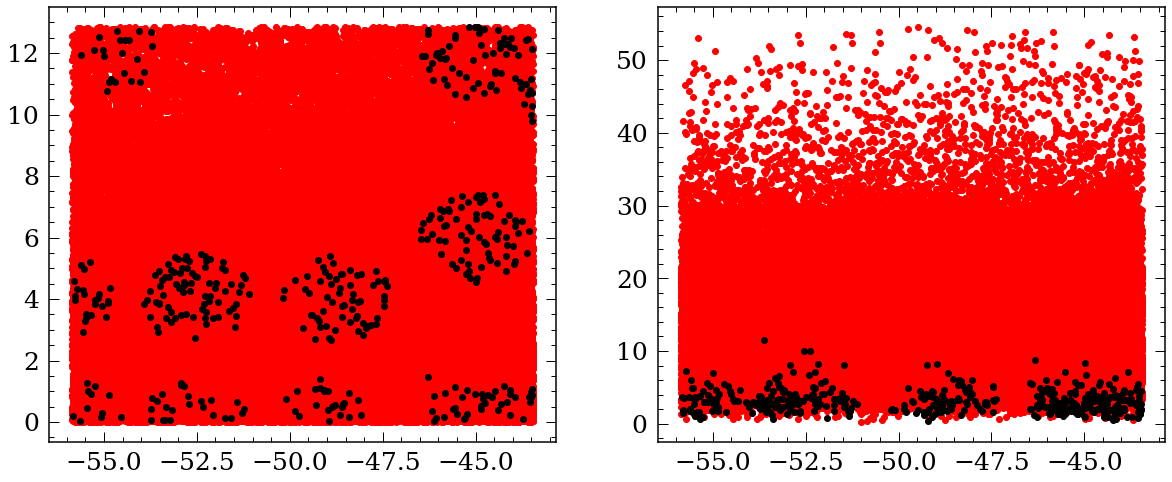

In [16]:
rarange=np.linspace(-180,180,30)
decrange=np.linspace(-90,90,15)
ra_sing,dec_sing=10,7


m_sim_ra=(sim['l']<rarange[ra_sing+1])&(sim['l']>rarange[ra_sing])
m_sim_dec=(sim['b']<decrange[dec_sing+1])&(sim['b']>decrange[dec_sing])
df_sing=sim[m_sim_ra&m_sim_dec]

        
m_sim_ra=(df['GLON']<rarange[ra_sing+1])&(df['GLON']>rarange[ra_sing])
m_sim_dec=(df['GLAT']<decrange[dec_sing+1])&(df['GLAT']>decrange[dec_sing])
df_data_sing=df[m_sim_ra&m_sim_dec]
print(len(df_sing),len(df_data_sing))
        
print('l range:',rarange[ra_sing+1],rarange[ra_sing])
print('b range:',decrange[dec_sing+1],decrange[dec_sing])
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df_sing['l'],df_sing['b'],c='r')
plt.scatter(df_data_sing['GLON'],df_data_sing['GLAT'],c='k')
plt.subplot(1,2,2)
plt.scatter(df_sing['l'],df_sing['dist'],c='r')
plt.scatter(df_data_sing['GLON'],df_data_sing['dist'],c='k')

100%|██████████| 10/10 [00:00<00:00, 144.67it/s]

[3.67804451 3.67804451 3.67804451]


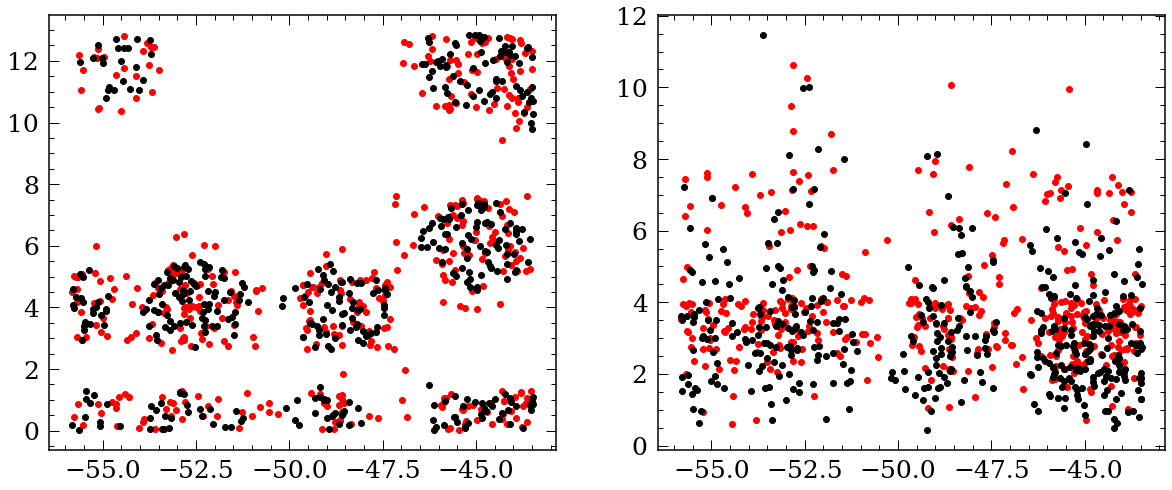

In [17]:
import random
ids=findstars(df_sing['l'].values,df_sing['b'].values,df_sing['dist'].values,df_sing['iords'].values,
              df_data_sing['GLON'].values,df_data_sing['GLAT'].values,df_data_sing['dist'],cutnumb=10)

len(ids)
sim_match=df_sing.loc[df_sing['iords'].isin(ids)]
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(sim_match['l'],sim_match['b'],c='r')
plt.scatter(df_data_sing['GLON'],df_data_sing['GLAT'],c='k')
plt.subplot(1,2,2)
plt.scatter(sim_match['l'],sim_match['dist'],c='r')
plt.scatter(df_data_sing['GLON'],df_data_sing['dist'],c='k')

In [18]:
# cut into 400 sections
import random
rarange=np.linspace(-180,180,30)
decrange=np.linspace(-90,90,15)
counts=0
for ra_sing in range(len(rarange)-1):
    for dec_sing in range(len(decrange)-1):
        m_sim_ra=(sim['l']<rarange[ra_sing+1])&(sim['l']>rarange[ra_sing])
        m_sim_dec=(sim['b']<decrange[dec_sing+1])&(sim['b']>decrange[dec_sing])
        df_sing=sim[m_sim_ra&m_sim_dec]
        sim=sim[~(m_sim_ra&m_sim_dec)].reset_index(drop=True)
        
        m_sim_ra=(df['GLON']<rarange[ra_sing+1])&(df['GLON']>rarange[ra_sing])
        m_sim_dec=(df['GLAT']<decrange[dec_sing+1])&(df['GLAT']>decrange[dec_sing])
        df_data_sing=df[m_sim_ra&m_sim_dec]
        df=df[~(m_sim_ra&m_sim_dec)].reset_index(drop=True)
        
        if len(df_data_sing)==0 or len(df_sing)==0:
            continue
        print(len(df_sing),len(sim),len(df_data_sing))
        ids=findstars(df_sing['l'].values,df_sing['b'].values,df_sing['dist'].values,df_sing['iords'].values,
              df_data_sing['GLON'].values,df_data_sing['GLAT'].values,df_data_sing['dist'],cutnumb=10)
        if len(ids)!=0:
            print('len ids:',len(ids))
            np.save('ids_'+str(counts),ids)
            counts=counts+1
        #clear_output(wait=True)
        


100%|██████████| 10/10 [00:00<00:00, 322.82it/s]

3112 7943816 303
[2.66039899 2.66039899 2.66039899]
len ids: 37



100%|██████████| 10/10 [00:00<00:00, 214.35it/s]

7266 7936550 494
[3.70606826 3.70606826 3.70606826]
len ids: 295



100%|██████████| 10/10 [00:00<00:00, 208.85it/s]

9821 7926729 390
[3.41623833 3.41623833 3.41623833]
len ids: 318



100%|██████████| 10/10 [00:00<00:00, 319.45it/s]

4549 7922180 383
[2.69004972 2.69004972 2.69004972]
len ids: 78



100%|██████████| 10/10 [00:00<00:00, 480.33it/s]

1900 7920280 43
[1.15761778 1.15761778 1.15761778]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 325.20it/s]

905 7919375 168
[1.54982805 1.54982805 1.54982805]
len ids: 31



100%|██████████| 10/10 [00:00<00:00, 340.14it/s]

453 7918922 97
[1.57413625 1.57413625 1.57413625]
len ids: 10



100%|██████████| 10/10 [00:00<00:00, 786.54it/s]

262 7918660 30
[0.29490097 0.29490097 0.29490097]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 1003.01it/s]

100 7918560 22
[0.16343333 0.16343333 0.16343333]



100%|██████████| 10/10 [00:00<00:00, 34239.22it/s]

3402 7911895 3
[1.32442873 1.32442873 1.32442873]



100%|██████████| 10/10 [00:00<00:00, 247.38it/s]

7759 7904136 453
[3.11485781 3.11485781 3.11485781]
len ids: 335



100%|██████████| 10/10 [00:00<00:00, 160.70it/s]

10205 7893931 783
[3.22974819 3.22974819 3.22974819]
len ids: 543



100%|██████████| 10/10 [00:00<00:00, 1801.75it/s]

4517 7889414 34
[3.03735469 3.03735469 3.03735469]
len ids: 23



100%|██████████| 10/10 [00:00<00:00, 305.02it/s]

1837 7887577 112
[1.58423252 1.58423252 1.58423252]
len ids: 14



100%|██████████| 10/10 [00:00<00:00, 730.63it/s]

853 7886724 71
[1.47902529 1.47902529 1.47902529]
len ids: 23



100%|██████████| 10/10 [00:00<00:00, 512.35it/s]

532 7886192 45
[1.13835572 1.13835572 1.13835572]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 1391.01it/s]

260 7885932 15
[0.09144389 0.09144389 0.09144389]



100%|██████████| 10/10 [00:00<00:00, 420.49it/s]

118 7885814 57
[0.19091679 0.19091679 0.19091679]
len ids: 8



100%|██████████| 10/10 [00:00<00:00, 687.52it/s]

3706 7878828 30
[2.52729765 2.52729765 2.52729765]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 86.90it/s]

8447 7870381 1771
[3.39468704 3.39468704 3.39468704]
len ids: 1217



100%|██████████| 10/10 [00:00<00:00, 102.07it/s]

11015 7859366 1394
[3.21224572 3.21224572 3.21224572]
len ids: 933



100%|██████████| 10/10 [00:00<00:00, 623.63it/s]

4699 7854667 38
[1.71038968 1.71038968 1.71038968]
len ids: 7



100%|██████████| 10/10 [00:00<00:00, 277.29it/s]

1932 7852735 109
[1.98331906 1.98331906 1.98331906]
len ids: 15



100%|██████████| 10/10 [00:00<00:00, 3256.19it/s]

924 7851811 8
[0.39016881 0.39016881 0.39016881]



100%|██████████| 10/10 [00:00<00:00, 474.81it/s]

529 7851282 59
[0.83253737 0.83253737 0.83253737]
len ids: 6



100%|██████████| 10/10 [00:00<00:00, 399.35it/s]

271 7851011 53
[0.5299215 0.5299215 0.5299215]
len ids: 3



100%|██████████| 10/10 [00:00<00:00, 408.40it/s]

89 7850922 68
[0.48565388 0.48565388 0.48565388]
len ids: 4



100%|██████████| 10/10 [00:00<00:00, 276.23it/s]

1725 7847594 121
[2.79583516 2.79583516 2.79583516]
len ids: 22



100%|██████████| 10/10 [00:00<00:00, 707.51it/s]

3925 7843669 74
[1.48407043 1.48407043 1.48407043]
len ids: 24



100%|██████████| 10/10 [00:00<00:00, 165.81it/s]

10146 7833523 846
[3.96451391 3.96451391 3.96451391]
len ids: 487



100%|██████████| 10/10 [00:00<00:00, 241.77it/s]

12901 7820622 444
[4.11611869 4.11611869 4.11611869]
len ids: 410



100%|██████████| 10/10 [00:00<00:00, 652.27it/s]

5221 7815401 30
[2.06283942 2.06283942 2.06283942]
len ids: 4



100%|██████████| 10/10 [00:00<00:00, 321.59it/s]

1915 7813486 217
[2.42781462 2.42781462 2.42781462]
len ids: 70



100%|██████████| 10/10 [00:00<00:00, 127.72it/s]

866 7812620 722
[1.66260676 1.66260676 1.66260676]
len ids: 161



100%|██████████| 10/10 [00:00<00:00, 195.79it/s]

515 7812105 314
[0.97646824 0.97646824 0.97646824]
len ids: 66



100%|██████████| 10/10 [00:00<00:00, 1044.68it/s]

332 7811773 28
[0.68717514 0.68717514 0.68717514]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 488.11it/s]

98 7811675 52
[0.36624165 0.36624165 0.36624165]
len ids: 7



100%|██████████| 10/10 [00:00<00:00, 2802.74it/s]

261 7811319 9
[0.24283944 0.24283944 0.24283944]



100%|██████████| 10/10 [00:00<00:00, 295.18it/s]

827 7809971 96
[2.26142955 2.26142955 2.26142955]
len ids: 4



100%|██████████| 10/10 [00:00<00:00, 318.41it/s]

1768 7808203 280
[2.77864063 2.77864063 2.77864063]
len ids: 80



100%|██████████| 10/10 [00:00<00:00, 491.86it/s]

4283 7803920 99
[1.63805509 1.63805509 1.63805509]
len ids: 28



100%|██████████| 10/10 [00:00<00:00, 121.37it/s]

12926 7790994 1324
[5.7398088 5.7398088 5.7398088]
len ids: 975



100%|██████████| 10/10 [00:00<00:00, 153.00it/s]

15558 7775436 918
[4.5366649 4.5366649 4.5366649]
len ids: 751



100%|██████████| 10/10 [00:00<00:00, 2678.18it/s]

5699 7769737 8
[0.95117704 0.95117704 0.95117704]



100%|██████████| 10/10 [00:00<00:00, 192.50it/s]

1893 7767844 491
[1.59643009 1.59643009 1.59643009]
len ids: 123



100%|██████████| 10/10 [00:00<00:00, 281.78it/s]

915 7766929 290
[1.55269782 1.55269782 1.55269782]
len ids: 78



100%|██████████| 10/10 [00:00<00:00, 210.91it/s]

553 7766376 267
[1.73319116 1.73319116 1.73319116]
len ids: 88



100%|██████████| 10/10 [00:00<00:00, 928.50it/s]

305 7766071 29
[0.4304731 0.4304731 0.4304731]



100%|██████████| 10/10 [00:00<00:00, 555.55it/s]

86 7765985 40
[0.18294646 0.18294646 0.18294646]



100%|██████████| 10/10 [00:00<00:00, 4395.16it/s]

284 7765612 6
[0.17023092 0.17023092 0.17023092]



100%|██████████| 10/10 [00:00<00:00, 1033.16it/s]

891 7764160 19
[0.80946046 0.80946046 0.80946046]



100%|██████████| 10/10 [00:00<00:00, 439.93it/s]

1794 7762366 291
[2.75516343 2.75516343 2.75516343]
len ids: 62



100%|██████████| 10/10 [00:00<00:00, 2398.12it/s]

4629 7757737 19
[1.64587674 1.64587674 1.64587674]
len ids: 11



100%|██████████| 10/10 [00:00<00:00, 218.53it/s]

16731 7741006 548
[3.72018655 3.72018655 3.72018655]
len ids: 467



100%|██████████| 10/10 [00:00<00:00, 82.23it/s]

20461 7720545 2258
[5.4896385 5.4896385 5.4896385]
len ids: 997



100%|██████████| 10/10 [00:00<00:00, 130.36it/s]

6278 7714267 1274
[2.16526552 2.16526552 2.16526552]
len ids: 231



100%|██████████| 10/10 [00:00<00:00, 468.20it/s]

1986 7712281 214
[2.16864659 2.16864659 2.16864659]
len ids: 82



100%|██████████| 10/10 [00:00<00:00, 136.17it/s]

1002 7711279 593
[1.57892138 1.57892138 1.57892138]
len ids: 163



100%|██████████| 10/10 [00:00<00:00, 174.29it/s]

489 7710790 360
[0.88499571 0.88499571 0.88499571]
len ids: 72



100%|██████████| 10/10 [00:00<00:00, 414.92it/s]

279 7710511 66
[0.39972271 0.39972271 0.39972271]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 604.05it/s]

98 7710413 39
[0.21208705 0.21208705 0.21208705]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 11403.76it/s]

302 7710017 3
[0.16446802 0.16446802 0.16446802]



100%|██████████| 10/10 [00:00<00:00, 436.80it/s]

943 7708573 60
[0.92229822 0.92229822 0.92229822]
len ids: 9



100%|██████████| 10/10 [00:00<00:00, 428.40it/s]

1890 7706683 60
[2.68391985 2.68391985 2.68391985]
len ids: 11



100%|██████████| 10/10 [00:00<00:00, 1192.72it/s]

5091 7701592 17
[1.27829075 1.27829075 1.27829075]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 187.97it/s]

21604 7679988 511
[3.65186211 3.65186211 3.65186211]
len ids: 425



100%|██████████| 10/10 [00:00<00:00, 71.65it/s]

25111 7654877 2602
[3.90204643 3.90204643 3.90204643]
len ids: 598



100%|██████████| 10/10 [00:00<00:00, 80.36it/s]

7122 7647755 2019
[3.01536682 3.01536682 3.01536682]
len ids: 295



100%|██████████| 10/10 [00:00<00:00, 212.60it/s]

2162 7645593 448
[1.98107193 1.98107193 1.98107193]
len ids: 132



100%|██████████| 10/10 [00:00<00:00, 311.05it/s]

1008 7644585 217
[1.69407874 1.69407874 1.69407874]
len ids: 80



100%|██████████| 10/10 [00:00<00:00, 247.82it/s]

575 7644010 202
[0.90200479 0.90200479 0.90200479]
len ids: 48



100%|██████████| 10/10 [00:00<00:00, 267.56it/s]

295 7643715 124
[0.51026003 0.51026003 0.51026003]
len ids: 16



100%|██████████| 10/10 [00:00<00:00, 640.77it/s]

113 7643602 31
[0.15074766 0.15074766 0.15074766]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 2723.22it/s]

285 7643241 9
[0.23854808 0.23854808 0.23854808]



100%|██████████| 10/10 [00:00<00:00, 576.90it/s]

588 7642653 46
[0.63932607 0.63932607 0.63932607]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 282.56it/s]

971 7641682 86
[1.03802214 1.03802214 1.03802214]
len ids: 3



100%|██████████| 10/10 [00:00<00:00, 563.26it/s]

2043 7639639 38
[1.29934125 1.29934125 1.29934125]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 798.46it/s]

6099 7633540 29
[2.49531791 2.49531791 2.49531791]
len ids: 8



100%|██████████| 10/10 [00:00<00:00, 103.48it/s]

29349 7604191 1252
[3.2457195 3.2457195 3.2457195]
len ids: 948



100%|██████████| 10/10 [00:00<00:00, 111.05it/s]

31018 7573173 1095
[4.20933285 4.20933285 4.20933285]
len ids: 940



100%|██████████| 10/10 [00:00<00:00, 265.32it/s]

7833 7565340 394
[2.22165844 2.22165844 2.22165844]
len ids: 96



100%|██████████| 10/10 [00:00<00:00, 168.95it/s]

2338 7563002 515
[1.78696588 1.78696588 1.78696588]
len ids: 175



100%|██████████| 10/10 [00:00<00:00, 715.67it/s]

1165 7561837 53
[1.19126756 1.19126756 1.19126756]
len ids: 11



100%|██████████| 10/10 [00:00<00:00, 254.78it/s]

587 7561250 168
[0.86087574 0.86087574 0.86087574]
len ids: 34



100%|██████████| 10/10 [00:00<00:00, 280.47it/s]

338 7560912 119
[0.82498009 0.82498009 0.82498009]
len ids: 29



100%|██████████| 10/10 [00:00<00:00, 1561.72it/s]

90 7560822 14
[0.20824734 0.20824734 0.20824734]



100%|██████████| 10/10 [00:00<00:00, 420.40it/s]

575 7559883 53
[1.62331471 1.62331471 1.62331471]
len ids: 11



100%|██████████| 10/10 [00:00<00:00, 345.96it/s]

999 7558884 63
[1.05207149 1.05207149 1.05207149]
len ids: 3



100%|██████████| 10/10 [00:00<00:00, 752.45it/s]

2212 7556672 44
[0.98293318 0.98293318 0.98293318]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 328.99it/s]

7344 7549328 201
[1.94196045 1.94196045 1.94196045]
len ids: 101



100%|██████████| 10/10 [00:00<00:00, 122.10it/s]

43708 7505620 908
[3.2879944 3.2879944 3.2879944]
len ids: 768



100%|██████████| 10/10 [00:00<00:00, 126.72it/s]

41990 7463630 809
[3.49135209 3.49135209 3.49135209]
len ids: 727



100%|██████████| 10/10 [00:00<00:00, 369.28it/s]

8506 7455124 240
[2.0132639 2.0132639 2.0132639]
len ids: 99



100%|██████████| 10/10 [00:00<00:00, 386.40it/s]

2555 7452569 194
[1.89958984 1.89958984 1.89958984]
len ids: 58



100%|██████████| 10/10 [00:00<00:00, 370.69it/s]

615 7450693 108
[1.08477346 1.08477346 1.08477346]
len ids: 33



100%|██████████| 10/10 [00:00<00:00, 1326.98it/s]

314 7450379 22
[0.42015729 0.42015729 0.42015729]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 869.88it/s]

116 7450263 23
[0.34411317 0.34411317 0.34411317]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 1253.00it/s]

288 7449889 16
[0.30201236 0.30201236 0.30201236]



100%|██████████| 10/10 [00:00<00:00, 763.95it/s]

610 7449279 32
[0.55298937 0.55298937 0.55298937]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 377.11it/s]

1089 7448190 62
[1.07752174 1.07752174 1.07752174]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 743.39it/s]

2472 7445718 29
[1.07156082 1.07156082 1.07156082]
len ids: 4



100%|██████████| 10/10 [00:00<00:00, 402.30it/s]

8739 7436979 104
[1.43443454 1.43443454 1.43443454]
len ids: 52



100%|██████████| 10/10 [00:00<00:00, 97.36it/s]

59359 7377620 1312
[3.16869612 3.16869612 3.16869612]
len ids: 931



100%|██████████| 10/10 [00:00<00:00, 116.04it/s]

54271 7323349 1069
[3.52096658 3.52096658 3.52096658]
len ids: 894



100%|██████████| 10/10 [00:00<00:00, 338.94it/s]

9739 7313610 178
[1.84587797 1.84587797 1.84587797]
len ids: 87



100%|██████████| 10/10 [00:00<00:00, 309.84it/s]

2839 7310771 83
[1.51541951 1.51541951 1.51541951]
len ids: 11



100%|██████████| 10/10 [00:00<00:00, 358.74it/s]

1271 7309500 67
[1.53964003 1.53964003 1.53964003]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 549.03it/s]

677 7308823 42
[0.69923046 0.69923046 0.69923046]
len ids: 4



100%|██████████| 10/10 [00:00<00:00, 361.52it/s]

323 7308500 71
[0.40182633 0.40182633 0.40182633]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 97997.76it/s]

281 7308004 1
[0. 0. 0.]



100%|██████████| 10/10 [00:00<00:00, 1499.04it/s]

693 7307311 12
[0.64871468 0.64871468 0.64871468]



100%|██████████| 10/10 [00:00<00:00, 535.53it/s]

1202 7306109 40
[1.1068817 1.1068817 1.1068817]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 441.74it/s]

2927 7303182 52
[1.36626807 1.36626807 1.36626807]
len ids: 6



100%|██████████| 10/10 [00:00<00:00, 620.76it/s]

10560 7292622 80
[1.83534928 1.83534928 1.83534928]
len ids: 47



100%|██████████| 10/10 [00:00<00:00, 163.26it/s]

79540 7213082 449
[3.18340044 3.18340044 3.18340044]
len ids: 443



100%|██████████| 10/10 [00:00<00:00, 174.53it/s]

69976 7143106 434
[3.67804451 3.67804451 3.67804451]
len ids: 428



100%|██████████| 10/10 [00:00<00:00, 519.45it/s]

11063 7132043 129
[3.01427359 3.01427359 3.01427359]
len ids: 104



100%|██████████| 10/10 [00:00<00:00, 269.46it/s]

3219 7128824 98
[1.446001 1.446001 1.446001]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 605.74it/s]

713 7126812 42
[0.57504382 0.57504382 0.57504382]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 548.43it/s]

381 7126431 49
[0.32969577 0.32969577 0.32969577]
len ids: 5



100%|██████████| 10/10 [00:00<00:00, 71943.46it/s]

110 7126321 2
[0.01739778 0.01739778 0.01739778]



100%|██████████| 10/10 [00:00<00:00, 1092.07it/s]

704 7125233 13
[0.60802296 0.60802296 0.60802296]
len ids: 1



100%|██████████| 10/10 [00:00<00:00, 362.50it/s]

1423 7123810 79
[2.19643056 2.19643056 2.19643056]
len ids: 23



100%|██████████| 10/10 [00:00<00:00, 26247.21it/s]

3308 7120502 3
[0.26887734 0.26887734 0.26887734]



100%|██████████| 10/10 [00:00<00:00, 303.49it/s]

13424 7107078 250
[2.04612662 2.04612662 2.04612662]
len ids: 158



100%|██████████| 10/10 [00:00<00:00, 114.35it/s]

113112 6993966 750
[3.29767524 3.29767524 3.29767524]
len ids: 641



100%|██████████| 10/10 [00:00<00:00, 105.86it/s]

98801 6895165 1010
[3.64193228 3.64193228 3.64193228]
len ids: 868



100%|██████████| 10/10 [00:00<00:00, 264.77it/s]

13498 6881667 345
[3.7227628 3.7227628 3.7227628]
len ids: 283



100%|██████████| 10/10 [00:00<00:00, 358.00it/s]

3508 6878159 190
[2.26609564 2.26609564 2.26609564]
len ids: 113



100%|██████████| 10/10 [00:00<00:00, 279.00it/s]

777 6875933 98
[0.74686733 0.74686733 0.74686733]
len ids: 13



100%|██████████| 10/10 [00:00<00:00, 301.03it/s]

420 6875513 103
[0.48794749 0.48794749 0.48794749]
len ids: 15



100%|██████████| 10/10 [00:00<00:00, 1469.47it/s]

96 6875417 14
[0.2394586 0.2394586 0.2394586]



100%|██████████| 10/10 [00:00<00:00, 639.83it/s]

760 6874252 42
[0.49340931 0.49340931 0.49340931]
len ids: 2



100%|██████████| 10/10 [00:00<00:00, 443.71it/s]

1784 6872468 64
[0.94980735 0.94980735 0.94980735]
len ids: 8



100%|██████████| 10/10 [00:00<00:00, 491.81it/s]

4255 6868213 75
[1.21795321 1.21795321 1.21795321]
len ids: 23



100%|██████████| 10/10 [00:00<00:00, 253.61it/s]

16639 6851574 433
[2.99040542 2.99040542 2.99040542]
len ids: 260



100%|██████████| 10/10 [00:00<00:00, 88.37it/s]

190973 6660601 891
[3.19730924 3.19730924 3.19730924]
len ids: 800



100%|██████████| 10/10 [00:00<00:00, 91.28it/s]

172729 6487872 829
[3.19865224 3.19865224 3.19865224]
len ids: 789



100%|██████████| 10/10 [00:00<00:00, 296.73it/s]

16649 6471223 342
[3.12922647 3.12922647 3.12922647]
len ids: 248



100%|██████████| 10/10 [00:00<00:00, 280.40it/s]

4029 6467194 291
[2.00514655 2.00514655 2.00514655]
len ids: 159



100%|██████████| 10/10 [00:00<00:00, 326.03it/s]

1544 6465650 83
[1.205062 1.205062 1.205062]
len ids: 12



100%|██████████| 10/10 [00:00<00:00, 201.59it/s]

895 6464755 164
[0.61519268 0.61519268 0.61519268]
len ids: 35



100%|██████████| 10/10 [00:00<00:00, 370.45it/s]

416 6464339 83
[0.28809166 0.28809166 0.28809166]
len ids: 6



100%|██████████| 10/10 [00:00<00:00, 944.98it/s]

114 6464225 19
[0.13002643 0.13002643 0.13002643]



100%|██████████| 10/10 [00:00<00:00, 842.89it/s]

872 6462899 42
[0.57047278 0.57047278 0.57047278]
len ids: 4



100%|██████████| 10/10 [00:00<00:00, 777.24it/s]

2068 6460831 73
[0.84513282 0.84513282 0.84513282]
len ids: 14



100%|██████████| 10/10 [00:00<00:00, 1240.55it/s]

4917 6455914 39
[1.03519729 1.03519729 1.03519729]
len ids: 14



100%|██████████| 10/10 [00:00<00:00, 183.69it/s]

22802 6433112 526
[3.14898765 3.14898765 3.14898765]
len ids: 367



100%|██████████| 10/10 [00:00<00:00, 52.77it/s]

470555 5962557 879
[3.18578609 3.18578609 3.18578609]
len ids: 810



 60%|██████    | 6/10 [00:00<00:00, 48.88it/s]

444808 5517749 1015
[3.7090539 3.7090539 3.7090539]


  0%|          | 0/10 [00:00<?, ?it/s]

len ids: 1002
22473 5495276 351
[1.75493507 1.75493507 1.75493507]


100%|██████████| 10/10 [00:00<00:00, 148.76it/s]


len ids: 240
4479 5490797 611
[2.80439379 2.80439379 2.80439379]
len ids: 336


100%|██████████| 10/10 [00:00<00:00, 210.02it/s]

1734 5489063 139
[1.19209555 1.19209555 1.19209555]
len ids: 53
941 5488122 193
[1.11624668 1.11624668 1.11624668]
len ids: 49



100%|██████████| 10/10 [00:00<00:00, 2552.99it/s]

447 5487675 12
[0.32931485 0.32931485 0.32931485]
124 5487551 9
[0.10173527 0.10173527 0.10173527]



100%|██████████| 10/10 [00:00<00:00, 1159.16it/s]

357 5487093 13
[0.15599121 0.15599121 0.15599121]
982 5486111 18
[0.42133928 0.42133928 0.42133928]



100%|██████████| 10/10 [00:00<00:00, 780.76it/s]

2066 5484045 245
[2.16349756 2.16349756 2.16349756]
len ids: 74
5218 5478827 46
[1.40106471 1.40106471 1.40106471]
len ids: 18



  0%|          | 0/10 [00:00<?, ?it/s]

27419 5451408 185
[1.8782577 1.8782577 1.8782577]
len ids: 68
1559738 3891670 739
[3.23452183 3.23452183 3.23452183]


  0%|          | 0/10 [00:00<?, ?it/s]

len ids: 659
1537522 2354148 786
[3.20683051 3.20683051 3.20683051]


  0%|          | 0/10 [00:00<?, ?it/s]

len ids: 732
27199 2326949 441
[3.04482463 3.04482463 3.04482463]
len ids: 268
4665 2322284 716
[1.76769337 1.76769337 1.76769337]


  0%|          | 0/10 [00:00<?, ?it/s]

len ids: 287
1761 2320523 207
[0.99712252 0.99712252 0.99712252]
len ids: 57
952 2319571 106
[0.74773582 0.74773582 0.74773582]


100%|██████████| 10/10 [00:00<00:00, 694.40it/s]


len ids: 21
438 2319133 34
[0.45662156 0.45662156 0.45662156]
len ids: 2


100%|██████████| 10/10 [00:00<00:00, 814.14it/s]

907 2317638 12
[0.3240676 0.3240676 0.3240676]
len ids: 1
1936 2315702 165
[0.76615837 0.76615837 0.76615837]
len ids: 45
4496 2311206 24
[0.9815619 0.9815619 0.9815619]
len ids: 6



  0%|          | 0/10 [00:00<?, ?it/s]

21411 2289795 192
[1.83182147 1.83182147 1.83182147]
len ids: 128
454764 1835031 1228
[3.17281819 3.17281819 3.17281819]


 50%|█████     | 5/10 [00:00<00:00, 40.75it/s]

len ids: 1062
443252 1391779 1068
[3.21306082 3.21306082 3.21306082]


  0%|          | 0/10 [00:00<?, ?it/s]

len ids: 1000
20885 1370894 923
[3.00032743 3.00032743 3.00032743]
len ids: 519
4336 1366558 802
[1.20744555 1.20744555 1.20744555]


100%|██████████| 10/10 [00:00<00:00, 421.62it/s]


len ids: 248
1791 1364767 179
[2.02870372 2.02870372 2.02870372]
len ids: 70
910 1363857 95
[0.77801249 0.77801249 0.77801249]
len ids: 19


100%|██████████| 10/10 [00:00<00:00, 146.27it/s]

777 1362159 7
[0.23689765 0.23689765 0.23689765]
1571 1360588 20
[0.83534282 0.83534282 0.83534282]
len ids: 1
3506 1357082 1
[0. 0. 0.]
14634 1342448 569
[3.14654873 3.14654873 3.14654873]
len ids: 393



  0%|          | 0/10 [00:00<?, ?it/s]

143524 1198924 783
[3.18885144 3.18885144 3.18885144]
len ids: 768
141390 1057534 717
[2.78857686 2.78857686 2.78857686]


100%|██████████| 10/10 [00:00<00:00, 167.33it/s]


len ids: 656
14761 1042773 703
[1.94856981 1.94856981 1.94856981]
len ids: 294
3945 1038828 607
[2.77898264 2.77898264 2.77898264]
len ids: 281


100%|██████████| 10/10 [00:00<00:00, 780.15it/s]


1689 1037139 108
[2.23597887 2.23597887 2.23597887]
len ids: 40
784 1036355 46
[0.92687924 0.92687924 0.92687924]
len ids: 8
365 1035990 24
[0.42419112 0.42419112 0.42419112]


  0%|          | 0/10 [00:00<?, ?it/s]

11653 1018623 42
[3.00688801 3.00688801 3.00688801]
len ids: 21
90694 927929 826
[3.23600613 3.23600613 3.23600613]
len ids: 664
91928 836001 658
[2.41065956 2.41065956 2.41065956]


100%|██████████| 10/10 [00:00<00:00, 465.53it/s]


len ids: 557
12173 823828 251
[1.44791276 1.44791276 1.44791276]
len ids: 137
3722 820106 210
[1.61247664 1.61247664 1.61247664]
len ids: 84
1686 818420 31
[0.66617017 0.66617017 0.66617017]
len ids: 3
720 817700 66
[0.79362771 0.79362771 0.79362771]
len ids: 17


100%|██████████| 10/10 [00:00<00:00, 2253.79it/s]

341 817359 58
[0.38777145 0.38777145 0.38777145]
len ids: 4
130 817229 14
[0.15421548 0.15421548 0.15421548]
10180 801918 7
[1.0370767 1.0370767 1.0370767]



100%|██████████| 10/10 [00:00<00:00, 265.87it/s]

66743 735175 265
[4.78259051 4.78259051 4.78259051]
len ids: 260
69580 665595 323
[3.21799853 3.21799853 3.21799853]
len ids: 284
10798 654797 100
[1.47589099 1.47589099 1.47589099]
len ids: 56
3491 651306 269
[2.55650073 2.55650073 2.55650073]
len ids: 106



  0%|          | 0/10 [00:00<?, ?it/s]

1696 649610 42
[0.66507519 0.66507519 0.66507519]
len ids: 6
672 648938 68
[0.82808651 0.82808651 0.82808651]
len ids: 11
381 648557 10
[0.21951882 0.21951882 0.21951882]
len ids: 1
136 648421 10
[0.12786375 0.12786375 0.12786375]
9145 634568 70
[1.48659312 1.48659312 1.48659312]


100%|██████████| 10/10 [00:00<00:00, 349.04it/s]

len ids: 5
47817 586751 22
[2.44798735 2.44798735 2.44798735]
len ids: 9
54184 532567 27
[2.382807 2.382807 2.382807]
len ids: 11
9666 522901 85
[1.47758398 1.47758398 1.47758398]
len ids: 12
3377 519524 105
[2.81261297 2.81261297 2.81261297]
len ids: 21
1594 517930 103
[2.20517812 2.20517812 2.20517812]



100%|██████████| 10/10 [00:00<00:00, 1565.16it/s]


len ids: 30
605 517325 70
[0.61801175 0.61801175 0.61801175]
len ids: 16
343 516982 39
[0.35832617 0.35832617 0.35832617]
len ids: 1
143 516839 13
[0.26491875 0.26491875 0.26491875]
len ids: 1


100%|██████████| 10/10 [00:00<00:00, 2815.35it/s]

1463 413620 105
[2.50357049 2.50357049 2.50357049]
len ids: 45
590 413030 89
[0.89219157 0.89219157 0.89219157]
len ids: 13
353 412677 29
[0.30872812 0.30872812 0.30872812]
128 412549 9
[0.3627626 0.3627626 0.3627626]



  0%|          | 0/10 [00:00<?, ?it/s]

1156 329670 130
[2.27680004 2.27680004 2.27680004]
len ids: 41
570 329100 74
[0.79263421 0.79263421 0.79263421]
len ids: 2
345 328755 27
[0.28392608 0.28392608 0.28392608]
146 328609 1
[0. 0. 0.]
1017 259164 139
[1.50410398 1.50410398 1.50410398]


  0%|          | 0/10 [00:00<?, ?it/s]

len ids: 31
512 258652 49
[0.53587177 0.53587177 0.53587177]
len ids: 3
339 258313 67
[0.68160126 0.68160126 0.68160126]
len ids: 10
143 258170 2
[0.02694575 0.02694575 0.02694575]
911 199453 33
[1.0361359 1.0361359 1.0361359]
487 198966 76
[1.17085246 1.17085246 1.17085246]


100%|██████████| 10/10 [00:00<00:00, 89051.04it/s]


len ids: 19
342 198624 8
[0.40949368 0.40949368 0.40949368]
468 148401 123
[1.88068157 1.88068157 1.88068157]
len ids: 28
335 148066 22
[0.29542488 0.29542488 0.29542488]
len ids: 1
174 147892 1
[0. 0. 0.]


  0%|          | 0/10 [00:00<?, ?it/s]

883 104947 92
[1.52495852 1.52495852 1.52495852]
len ids: 3
479 104468 89
[0.66314467 0.66314467 0.66314467]
len ids: 5
391 104077 10
[0.27005013 0.27005013 0.27005013]
155 103922 1
[0. 0. 0.]
526 66316 73
[0.85786268 0.85786268 0.85786268]
len ids: 9
360 65956 49
[0.35932625 0.35932625 0.35932625]


100%|██████████| 10/10 [00:00<00:00, 783.94it/s]

len ids: 2
137 65819 32
[0.32890657 0.32890657 0.32890657]
len ids: 3
883 32437 85
[1.4055641 1.4055641 1.4055641]
len ids: 9
484 31953 70
[0.74606883 0.74606883 0.74606883]
len ids: 13
116 31540 2
[0.00305061 0.00305061 0.00305061]
7126 18274 29
[3.37994491 3.37994491 3.37994491]
len ids: 15
10221 8053 266
[4.02314709 4.02314709 4.02314709]
len ids: 181
4546 3507 88
[1.71557762 1.71557762 1.71557762]



100%|██████████| 10/10 [00:00<00:00, 66576.25it/s]

len ids: 17
1745 1762 50
[1.07909528 1.07909528 1.07909528]
len ids: 2
922 840 78
[1.25957857 1.25957857 1.25957857]
len ids: 10
452 388 70
[0.74992169 0.74992169 0.74992169]
len ids: 4
285 103 27
[0.36959591 0.36959591 0.36959591]
len ids: 1
103 0 2
[0.0052731 0.0052731 0.0052731]


see matching results

In [19]:
ids=np.array([])
for i in range(counts):
    ids=np.append(ids,np.load('matches_279/ids_'+str(i)+'.npy'))

In [20]:
df=pd.read_pickle('../SecondYear_2/Data/CannonDR16_cut.pkl')
df['GLON']=df['GLON']-180

sim=pd.read_pickle('Data/Buck_g2_79e12.pkl')
sim=sim.dropna(subset=['x_today','y_today','z_today']).reset_index(drop=True)

sim['x'],sim['y'],sim['z']=sim['x_today'],sim['y_today'],sim['z_today']
r0=8.2
x=sim['x'].values
y=r0+sim['y'].values
z=sim['z'].values
dist=np.sqrt(x**2+y**2)
sim['dist']=dist

ls=np.zeros(len(sim))
bs=np.zeros(len(sim))
for i in range(len(x)):
    ls[i] = m.atan2(-x[i],y[i])
    bs[i] = m.atan2(z[i], dist[i])
    
sim['l']  = ls*180/np.pi
sim['b'] = bs*180/np.pi


sim_match=sim.loc[sim['iords'].isin(ids)]

<ipython-input-21-5b42a25333ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_match['feh_scale']=sim_match['feh']*scale_fe+np.median(df['M_H'])-np.median(sim_match['feh'])
<ipython-input-21-5b42a25333ee>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_match['ofe_scale']=sim_match['ofe']*scale_o+np.median(df['O_FE'])-np.median(sim_match['ofe'])


NameError: name 'p' is not defined

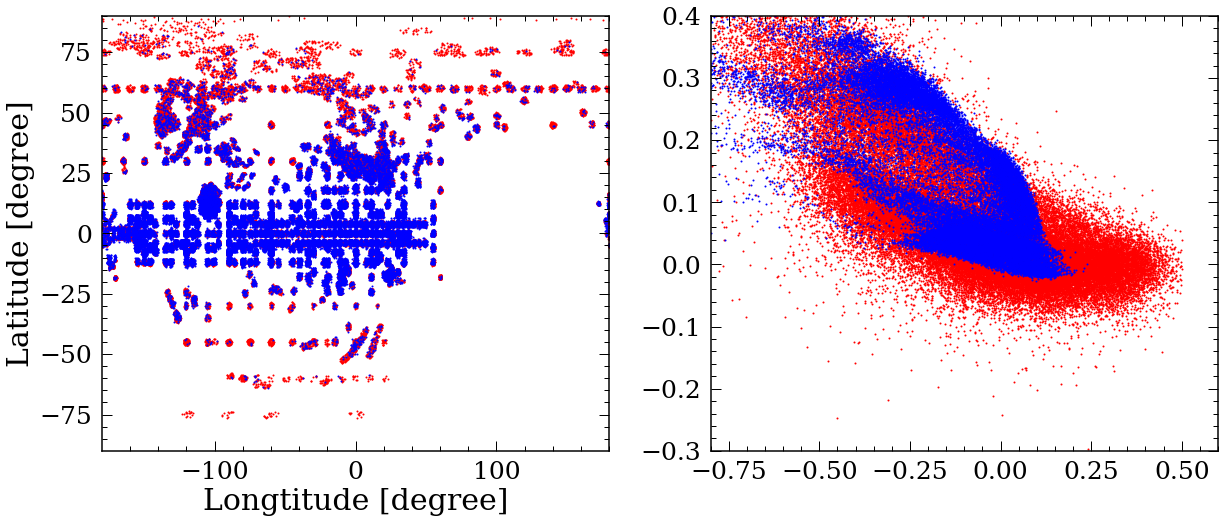

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

plt.scatter(df['GLON'],df['GLAT'],s=1,c='r')
plt.scatter(sim_match['l'],sim_match['b'],s=1,c='b')
plt.xlabel('Longtitude [degree]')
plt.ylabel('Latitude [degree]')
plt.xlim([-180,180])
plt.ylim([-90,90])


plt.subplot(1,2,2)
plt.scatter(df['M_H'],df['O_FE'],s=1,c='r')
scale_fe=np.std(df['M_H'])/np.std(sim_match['feh'])
scale_o=np.std(df['O_FE'])/np.std(sim_match['ofe'])
plt.xlim([-0.8,0.6])
plt.ylim([-0.3,0.4])

sim_match['feh_scale']=sim_match['feh']*scale_fe+np.median(df['M_H'])-np.median(sim_match['feh'])
sim_match['ofe_scale']=sim_match['ofe']*scale_o+np.median(df['O_FE'])-np.median(sim_match['ofe'])

plt.scatter(sim_match['feh_scale'],sim_match['ofe_scale'],s=1,c='b')
plt.plot([-0.8,0.6],p([-0.8,0.6]),'k--')
plt.ylabel('[O/Fe]')
plt.xlabel('[Fe/H]')
plt.scatter([-999],[-999],s=50,c='r',label='APOGEE DR16\n (Lu+2021)')
plt.scatter([-999],[-999],s=50,c='b',label='Simulation\n g2.79e12')
plt.legend()
plt.tight_layout()
plt.savefig('selection.png')

In [ ]:

sim_match['R']=np.sqrt(sim_match['x_today']**2+sim_match['y_today']**2)
plt.scatter(sim_match['R'],sim_match['z_today'],s=1,c='b',alpha=0.2)
plt.scatter(df['R'],df['z'],s=1,c='r',alpha=0.2)
plt.ylim([-10,20])

In [ ]:
np.mean(df['M_H']),np.mean(df['O_FE'])

In [ ]:
plt.figure(figsize=(10,8))
p=fitpoints([-0.8,0.6],[0.105,0.005])
plt.scatter(df['M_H'],df['O_FE'],s=1,c='r')
plt.scatter([-999],[-999],s=50,c='r',label='APOGEE DR16\n (Lu+2020)')
scale_fe=np.std(df['M_H'])/np.std(sim_match['feh'])
scale_o=np.std(df['O_FE'])/np.std(sim_match['ofe'])
plt.xlim([-0.8,0.6])
plt.ylim([-0.3,0.4])

sim_match['feh_scale']=sim_match['feh']*scale_fe+np.median(df['M_H'])-np.median(sim_match['feh'])
sim_match['ofe_scale']=sim_match['ofe']*scale_o+np.median(df['O_FE'])-np.median(sim_match['ofe'])

plt.scatter(sim_match['feh_scale'],sim_match['ofe_scale'],s=1,c='b')
plt.scatter([-999],[-999],s=50,c='b',label='simulation\n g2.79e12')
plt.plot([-0.8,0.6],p([-0.8,0.6]),'k--')
plt.legend()
plt.xlabel('[O/Fe]')
plt.ylabel('[Fe/H]')

In [22]:
sim_match.to_pickle('Data/Buck_g2_79e12_apogee_selec.pkl')

In [313]:
len(sim_match)

35944

In [338]:
data=df

In [340]:
def getave_age(age,feh,jz=False,jzs=[],fuc=np.median,Nbin=50):
    sgm=np.std(feh)
    meanfeh=np.mean(feh)
    febins=np.linspace(meanfeh-5*sgm,meanfeh+5*sgm,Nbin)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    if jz==True:
        meanjz=np.zeros(Nbin-1)
    for i in trange(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]
        #print(binlow,binhi)

        m=(feh>=binlow)&(feh<=binhi)
        
        if sum(m)==0:
            continue
        meanfeh[i]=(binlow+binhi)/2
        #print(sum(m))
        if jz==True:
            meanjz[i]=fuc(jzs[m])
        meanage[i]=np.mean(age[m])
        meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
        starnumb[i]=sum(m)
    if jz==True:
        return meanfeh,meanage,meanage_err,meanjz,starnumb
    else:
        return meanfeh,meanage,meanage_err,starnumb

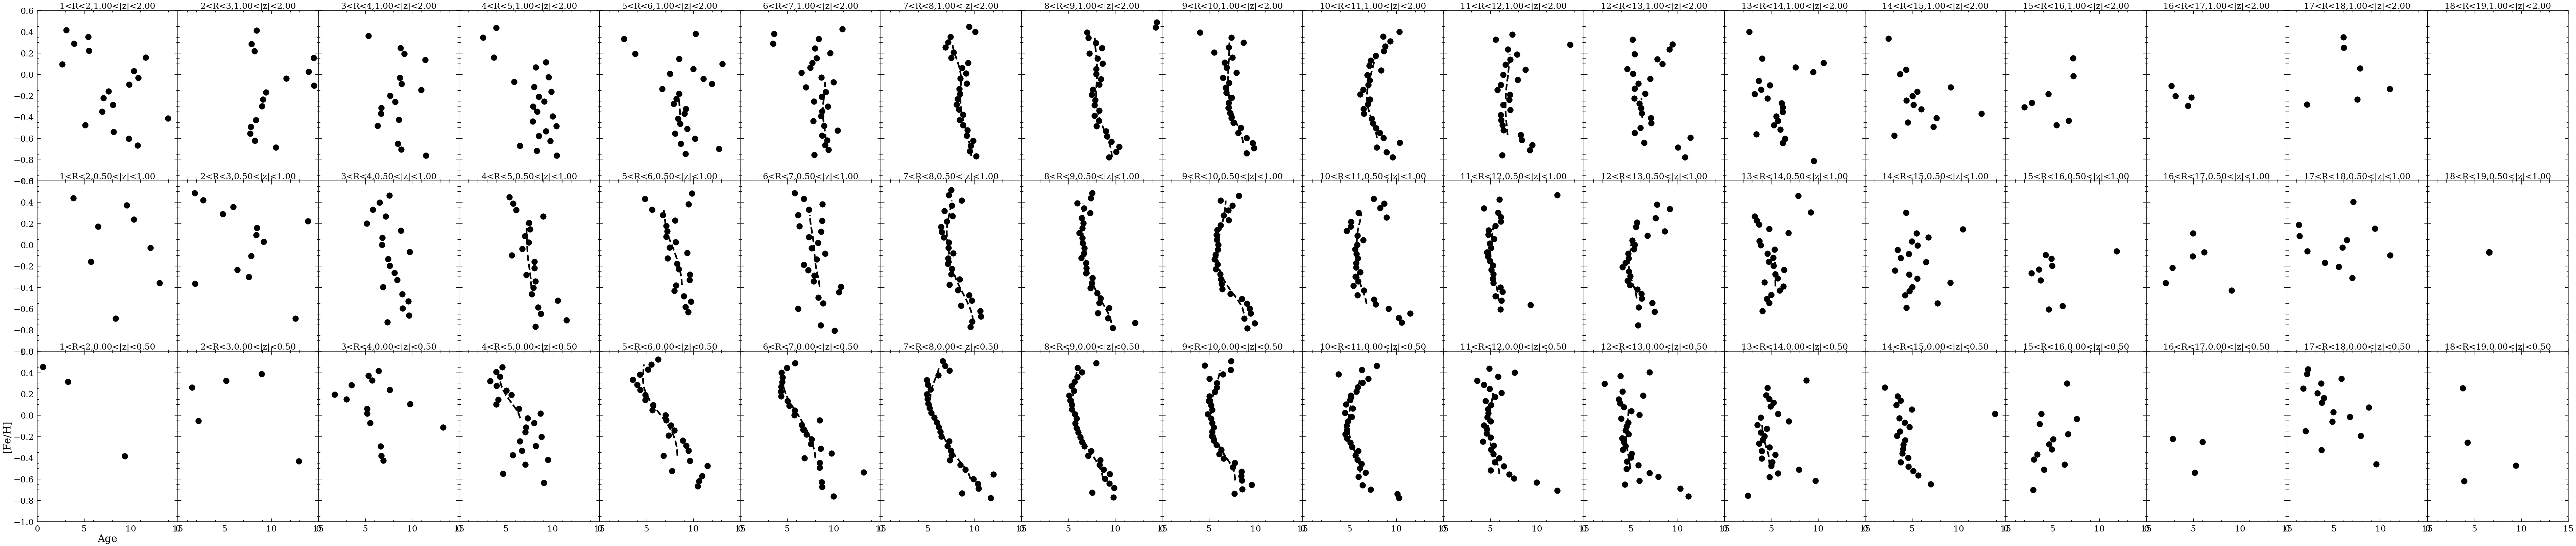

In [349]:
# feage turning points
# plotting as similar to paper
cmap = plt.cm.get_cmap('coolwarm',10)
Rbin=[2,1,0.5,0]
zbin=range(1,20)

lims=[-8,8]

fig, axarr = plt.subplots(len(Rbin)-1,len(zbin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(130,30))

bottom, top = 0.2, 0.9
left, right = 0.1, 0.9

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)


for i in range(len(Rbin)-1):
    df_all=data.loc[data['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
   
        meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'],df_all_z['M_H'],Nbin=50)
        
        
        
        clear_output(wait = True)
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        
        m2=starnumb>10
        filterage=gaussian_filter(meanage[m2], sigma=3)
        axarr[i,j].plot(filterage,meanfeh[m2],'k--',linewidth=5)
        
        #im=axarr[i,j].errorbar(meanage,meanfeh,xerr=meanage_err,fmt='k.')
        im=axarr[i,j].scatter(meanage,meanfeh,c='k',s=300,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
        axarr[i,j].set_xlim([0,15])
        
        axarr[i,j].set_ylim([-1,0.6])
        
        axarr[i,j].set_title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
 
        if i!=len(Rbin)-2:
            axarr[i,j].set_xticklabels([])
        if j!=0:
            axarr[i,j].set_yticklabels([])
        
axarr[len(Rbin)-2,0].set_xlabel('Age')
axarr[len(Rbin)-2,0].set_ylabel('[Fe/H]')



plt.savefig('M_H_data.png')